In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('heart_imputed.csv')
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0.0,150.0,0,2.3,0.0,0.0,3.0,0
1,67,1,0,160.0,286.0,0,0.0,108.0,1,1.5,1.0,3.0,1.0,1
2,67,1,0,120.0,229.0,0,0.0,129.0,1,2.6,1.0,2.0,2.0,1


In [11]:
from sklearn.model_selection import train_test_split
y = data['num']
X = data.drop('num', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0)).values
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0)).values

In [13]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
    actual.append(i)
    predcition.append(j)
    
dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
fig.update_layout(autosize=False, width=900, height=300)
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred, mode='markers', name='Pred'))

In [19]:
from sklearn.metrics import accuracy_score
print('The Accuracy Score is: ', str((accuracy_score(y_test,y_pred) * 100).round(3)) + '%')

The Accuracy Score is:  78.804%


[Text(0.5, 3.722222222222216, 'Actual Values'),
 Text(20.722222222222214, 0.5, 'Predicted Values')]

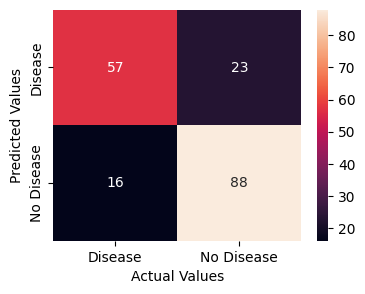

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
x_labels = y_labels = ['Disease', 'No Disease']
s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, xticklabels=x_labels, yticklabels=y_labels)
s.set(xlabel='Actual Values', ylabel='Predicted Values')